In [25]:
import numpy as np
import scipy as sc
import os, re
import matplotlib.pyplot as plt
from prettyprint import pp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from datetime import datetime as dt
from ipy_table import *
from string import punctuation, digits

In [26]:
data_path = '/Users/alexandre/Projects/TextClassificationBayes/tok_vnexpress/'
stopwords_path = '/Users/alexandre/Projects/TextClassificationBayes/vietnamese-stopwords-dash.txt'


#Classes are the folder names
class_names = os.listdir(data_path)
folders =  [data_path + folder + '/' for folder in os.listdir(data_path) if folder != ".DS_Store"]

if '.DS_Store' in class_names: del class_names[0]


#list the files of each class
files = {}

for folder, name in zip(folders, class_names):
    files[name] = [folder + f for f in os.listdir(folder)]
    
    
train_test_ratio = 0.7

In [27]:
def train_test_split(ratio, classes, files):
    """
    this method will split the input list of files to train and test sets.
    *Note: currently this method uses the simplest way an array can be split in two parts.
    Parameters
    ----------
    ratio: float
           ratio of total documents in each class assigned to the training set
    classes: list
             list of label classes
    files: dictionary
           a dictionary with list of files for each class
    
    Returns
    -------
    train_dic: dictionary
                a dictionary with lists of documents in the training set for each class
    test_dict: dictionary
                a dictionary with lists of documents in the testing set for each class
    """
    train_dict = {}
    test_dict = {}
    for cl in classes:
        train_cnt = int(ratio * len(files[cl]))
        train_dict[cl] = files[cl][:train_cnt]
        test_dict[cl] = files[cl][train_cnt:]
    return train_dict, test_dict


train_path, test_path = train_test_split(train_test_ratio, class_names, files)
#train_path, test_path, class_train, class_test = train_test_split(files, class_names, test_size=0.3, random_state=42)
stop_word = []

def loadStopWord(path):

    from string import punctuation, digits
    stop_word = []
    try:
        f = open(path)
        lines = [line.rstrip('\n') for line in open(path)]
        lines = [line.replace('_', '') for line in lines]
            
    finally:
        f.close()
    return lines

stop_word = loadStopWord(stopwords_path)


def cleanupText(path):
    """
    this method will read in a text file and try to cleanup its text.
    Parameters
    ----------
    path: path to the document file
    
    Returns
    -------
    text_cleaned: cleaned up raw text in the input file
    """
    
    text_cleaned = ''
    try:
        f = open(path)
        raw = f.read().lower()
        text =  raw
        text_cleaned = text.translate(None, punctuation + digits)
        # print "\n Word count before:" + str(len(text_translated.split())) + "\n"
        # for stop in stop_word:
        #   text_translated = text_translated.replace(stop,'')
        # print "\n Word count after:" + str(len(text_translated.split())) + "\n"
        text_cleaned = ' '.join([word for word in text_cleaned.split(' ') if (word and len(word) > 1)])
        
    finally:
        f.close()
    return text_cleaned

In [28]:
train_arr = []
test_arr = []
train_lbl = []
test_lbl = []


for cl in class_names:
    for path in train_path[cl]:
        train_arr.append(cleanupText(path))
        train_lbl.append(cl)
    for path in test_path[cl]:
        test_arr.append(cleanupText(path))
        test_lbl.append(cl)
        
print len(train_arr)
print len(test_arr)

33236
14251


In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(train_arr)
train_mat = vectorizer.transform(train_arr)
print train_mat.shape
#print train_mat
test_mat = vectorizer.transform(test_arr)
print test_mat.shape

tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
print train_tfmat.shape
#print train_tfmat
test_tfmat = tfidf.transform(test_mat)
print test_tfmat.shape

(33236, 133112)
(14251, 133112)
(33236, 133112)
(14251, 133112)


In [30]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    """
    this method will first train the classifier on the training data
    and will then test the trained classifier on test data.
    Finally it will report some metrics on the classifier performance.
    
    Parameters
    ----------
    x_train: np.ndarray
             train data matrix
    y_train: list
             train data label
    x_test: np.ndarray
            test data matrix
    y_test: list
            test data label
    clf: sklearn classifier object implementing fit() and predict() methods
    
    Returns
    -------
    metrics: list
             [training time, testing time, recall and precision for every class, macro-averaged F1 score]
    """
    #metrics = []
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print 'training time: ', (end - start)
    
    # add training time to metrics
    #metrics.append(end-start)
    
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print 'testing time: ', (end - start)
    
    print 'classification report: '

    pp(classification_report(y_test, yhat))
    
    print 'f1 score'
    print f1_score(y_test, yhat, average='macro')
    
    print 'accuracy score'
    accuracy = accuracy_score(y_test, yhat)
    print accuracy
 
    print 'confusion matrix:'
    print confusion_matrix(y_test, yhat)
    
    # plot the confusion matrix
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    
    return accuracy

metrics_dict = {}



alpha= =5
training time:  0:01:19.319887
testing time:  0:00:19.196373
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.91      0.75      0.82      1184
   giai-tri       0.90      0.96      0.93      1373
   giao-duc       0.96      0.82      0.89      1266
   khoa-hoc       0.92      0.82      0.87      1320
 kinh-doanh       0.56      0.97      0.71      1350
 oto-xe-may       0.98      0.83      0.90      1261
  phap-luat       0.81      0.86      0.83      1350
     so-hoa       0.93      0.78      0.85      1208
   the-gioi       0.85      0.90      0.87      1344
   the-thao       0.96      0.99      0.98      1373
    thoi-su       0.85      0.61      0.71      1222

avg / total       0.87      0.85      0.85     14251
"
f1 score
0.850496513526
accuracy score
0.848782541576
confusion matrix:
[[ 884   37    6   32  137    0    6    3   61    3   15]
 [   1 1322    4    1   27    0    4    2    9    2    1]
 [  12   29 1044   27  

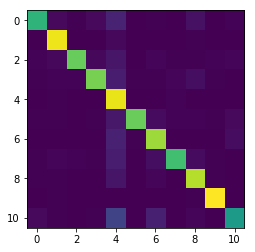

alpha= =2
training time:  0:01:17.345137
testing time:  0:00:18.801492
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.90      0.78      0.84      1184
   giai-tri       0.91      0.97      0.94      1373
   giao-duc       0.95      0.84      0.89      1266
   khoa-hoc       0.91      0.85      0.88      1320
 kinh-doanh       0.62      0.96      0.75      1350
 oto-xe-may       0.99      0.84      0.91      1261
  phap-luat       0.83      0.88      0.85      1350
     so-hoa       0.94      0.80      0.87      1208
   the-gioi       0.86      0.91      0.88      1344
   the-thao       0.97      0.99      0.98      1373
    thoi-su       0.83      0.67      0.75      1222

avg / total       0.88      0.87      0.87     14251
"
f1 score
0.866424805745
accuracy score
0.865763806049
confusion matrix:
[[ 923   34    7   39  102    0    6    2   52    1   18]
 [   0 1330    4    1   21    0    4    2    9    1    1]
 [  13   28 1061   29  

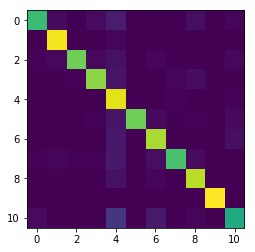

alpha= =1
training time:  0:01:14.791970
testing time:  0:00:18.931746
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.89      0.80      0.84      1184
   giai-tri       0.92      0.97      0.94      1373
   giao-duc       0.95      0.85      0.90      1266
   khoa-hoc       0.91      0.87      0.89      1320
 kinh-doanh       0.66      0.95      0.78      1350
 oto-xe-may       0.98      0.86      0.92      1261
  phap-luat       0.84      0.89      0.86      1350
     so-hoa       0.95      0.81      0.87      1208
   the-gioi       0.87      0.91      0.89      1344
   the-thao       0.98      0.99      0.98      1373
    thoi-su       0.83      0.72      0.77      1222

avg / total       0.89      0.88      0.88     14251
"
f1 score
0.87708254463
accuracy score
0.876991088345
confusion matrix:
[[ 948   30    7   44   75    1    7    2   47    0   23]
 [   2 1329    4    2   20    0    3    2    9    1    1]
 [  12   23 1082   29   

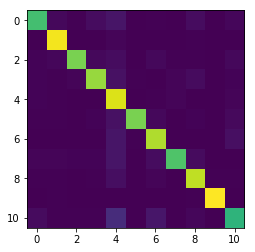

alpha= =0.75
training time:  0:01:15.410418
testing time:  0:00:18.956157
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.89      0.81      0.85      1184
   giai-tri       0.92      0.97      0.94      1373
   giao-duc       0.94      0.86      0.90      1266
   khoa-hoc       0.90      0.87      0.89      1320
 kinh-doanh       0.68      0.94      0.79      1350
 oto-xe-may       0.98      0.86      0.92      1261
  phap-luat       0.85      0.89      0.87      1350
     so-hoa       0.95      0.81      0.88      1208
   the-gioi       0.87      0.92      0.89      1344
   the-thao       0.98      0.99      0.98      1373
    thoi-su       0.82      0.73      0.77      1222

avg / total       0.89      0.88      0.88     14251
"
f1 score
0.8802985558
accuracy score
0.880499614062
confusion matrix:
[[ 957   27    8   46   67    1    7    2   46    0   23]
 [   4 1329    4    2   18    0    3    2    9    1    1]
 [  11   22 1087   30 

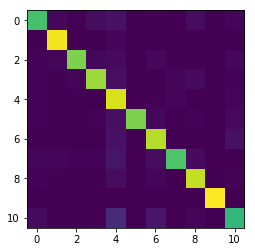

alpha= =0.5
training time:  0:01:17.247727
testing time:  0:00:19.144623
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.82      0.85      1184
   giai-tri       0.93      0.97      0.95      1373
   giao-duc       0.93      0.86      0.90      1266
   khoa-hoc       0.90      0.88      0.89      1320
 kinh-doanh       0.70      0.94      0.80      1350
 oto-xe-may       0.98      0.87      0.93      1261
  phap-luat       0.86      0.89      0.87      1350
     so-hoa       0.95      0.82      0.88      1208
   the-gioi       0.88      0.92      0.90      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.81      0.75      0.78      1222

avg / total       0.89      0.88      0.89     14251
"
f1 score
0.884449922492
accuracy score
0.884920356466
confusion matrix:
[[ 967   26    8   48   60    1    7    2   40    0   25]
 [   5 1331    6    2   16    0    3    2    7    0    1]
 [  11   21 1095   30

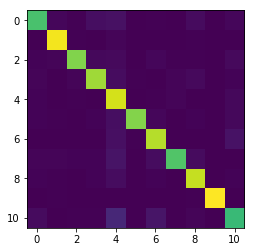

alpha= =0.25
training time:  0:01:16.646392
testing time:  0:00:18.788358
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.83      0.85      1184
   giai-tri       0.94      0.97      0.95      1373
   giao-duc       0.92      0.87      0.89      1266
   khoa-hoc       0.90      0.89      0.89      1320
 kinh-doanh       0.75      0.93      0.83      1350
 oto-xe-may       0.98      0.89      0.93      1261
  phap-luat       0.86      0.89      0.88      1350
     so-hoa       0.94      0.83      0.88      1208
   the-gioi       0.89      0.92      0.90      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.81      0.78      0.80      1222

avg / total       0.90      0.89      0.89     14251
"
f1 score
0.891746619796
accuracy score
0.892639113045
confusion matrix:
[[ 986   24    9   53   39    1    6    2   37    0   27]
 [   5 1332    9    3   11    0    3    2    7    0    1]
 [  11   19 1100   3

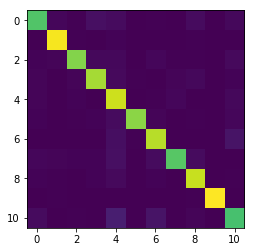

alpha= =0.1
training time:  0:01:15.441541
testing time:  0:00:18.275320
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.84      0.85      1184
   giai-tri       0.95      0.97      0.96      1373
   giao-duc       0.91      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.79      0.91      0.84      1350
 oto-xe-may       0.98      0.90      0.94      1261
  phap-luat       0.88      0.89      0.89      1350
     so-hoa       0.95      0.83      0.89      1208
   the-gioi       0.90      0.93      0.91      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.80      0.81      0.80      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.89587470516
accuracy score
0.89691951442
confusion matrix:
[[ 994   17   14   61   30    1    5    2   31    0   29]
 [   6 1331   11    4    9    0    3    2    6    0    1]
 [  11   15 1101   32  

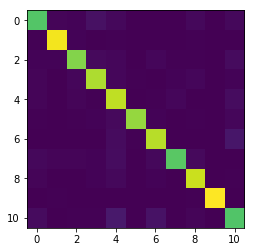

alpha= =0.075
training time:  0:01:13.090779
testing time:  0:00:19.042369
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.86      0.84      0.85      1184
   giai-tri       0.95      0.97      0.96      1373
   giao-duc       0.90      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.80      0.91      0.85      1350
 oto-xe-may       0.98      0.91      0.94      1261
  phap-luat       0.88      0.90      0.89      1350
     so-hoa       0.95      0.83      0.89      1208
   the-gioi       0.90      0.93      0.91      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.80      0.82      0.81      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.897252677233
accuracy score
0.898322924707
confusion matrix:
[[ 998   14   16   61   28    1    5    2   30    0   29]
 [   6 1331   11    5    8    0    2    3    6    0    1]
 [  11   14 1102   

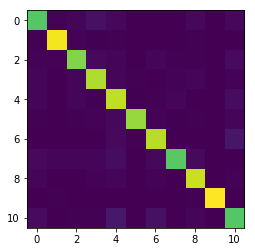

alpha= =0.05
training time:  0:01:12.938064
testing time:  0:00:18.200754
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.86      0.85      0.85      1184
   giai-tri       0.95      0.97      0.96      1373
   giao-duc       0.90      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.81      0.90      0.86      1350
 oto-xe-may       0.98      0.91      0.95      1261
  phap-luat       0.89      0.89      0.89      1350
     so-hoa       0.95      0.84      0.89      1208
   the-gioi       0.90      0.93      0.91      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.80      0.83      0.81      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.898777935058
accuracy score
0.899866676023
confusion matrix:
[[1002   14   16   61   26    1    5    2   30    0   27]
 [   7 1333   11    5    6    0    2    3    5    0    1]
 [  11   13 1105   3

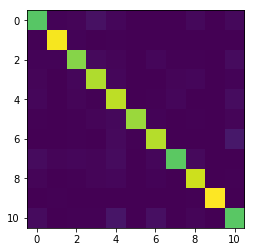

alpha= =0.025
training time:  0:01:11.798007
testing time:  0:00:18.101972
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.85      0.85      1184
   giai-tri       0.95      0.97      0.96      1373
   giao-duc       0.90      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.83      0.89      0.86      1350
 oto-xe-may       0.98      0.92      0.95      1261
  phap-luat       0.89      0.89      0.89      1350
     so-hoa       0.94      0.84      0.89      1208
   the-gioi       0.91      0.93      0.92      1344
   the-thao       0.99      0.98      0.99      1373
    thoi-su       0.79      0.84      0.82      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.899612034929
accuracy score
0.900708722195
confusion matrix:
[[1005   14   16   63   22    1    5    2   29    0   27]
 [   7 1334   10    4    5    0    2    4    5    0    2]
 [  11   13 1105   

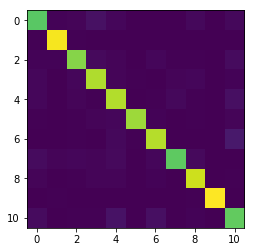

alpha= =0.01
training time:  0:01:11.797108
testing time:  0:00:18.363866
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.85      0.85      1184
   giai-tri       0.96      0.97      0.96      1373
   giao-duc       0.90      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.84      0.88      0.86      1350
 oto-xe-may       0.98      0.92      0.95      1261
  phap-luat       0.90      0.89      0.90      1350
     so-hoa       0.94      0.84      0.89      1208
   the-gioi       0.91      0.93      0.92      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.79      0.85      0.82      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.900867131553
accuracy score
0.901971791453
confusion matrix:
[[1008   14   15   63   22    1    4    2   29    0   26]
 [   7 1336    9    4    4    0    2    4    5    0    2]
 [  14   12 1106   3

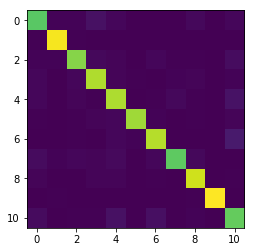

In [31]:
#'name', 'metrics'

#bnb = BernoulliNB()
#bnb_me = testClassifier(train_tfmat, train_lbl, test_tfmat, test_lbl, bnb)
#metrics_dict.append({'name':'BernoulliNB', 'metrics':bnb_me})
#
#
#gnb = GaussianNB()
#gnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, gnb)
#metrics_dict.append({'name':'GaussianNB', 'metrics':gnb_me})
alpha=[5,2,1,0.75,0.5,0.25,0.1,0.075,0.05,0.025,0.01]

for a in alpha:
    print "alpha= =" + str(a)
    mnb = MultinomialNB(a)
    mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
    metrics_dict.update({a:mnb_me})

#mnb = MultinomialNB(alpha=0.01)
#mnb_me = testClassifier(train_mat.toarray(), train_lbl, test_mat.toarray(), test_lbl, mnb)
#mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
#metrics_dict.append({'name':'MultinomialNB', 'metrics':mnb_me})


(0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2, 5)
(0.90197179145323136, 0.9007087221949337, 0.89986667602273529, 0.89832292470703812, 0.8969195144200407, 0.89263911304469856, 0.88492035646621292, 0.88049961406217103, 0.87699108834467754, 0.86576380604869829, 0.84878254157602973)


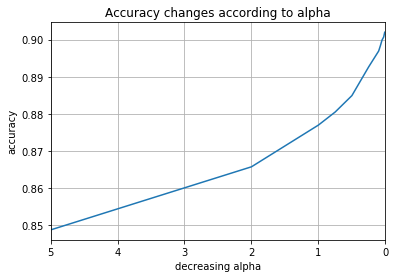

In [34]:
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.gca().invert_xaxis()
plt.xlim(5, 0)  # decreasing time
plt.xlabel('decreasing alpha')
plt.ylabel('accuracy')
plt.title('Accuracy changes according to alpha')
plt.grid(True)

plt.show()